<a href="https://colab.research.google.com/github/Kirtanaaa/Neclear-Power-Plant-Energy-Prediction/blob/main/Nuclear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NUCLEAR POWER PLANT ENERGY PREDICTION ANALYSIS

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [252]:
ds = pd.read_csv('npp.csv')
x = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values
x1 = ds.iloc[:,0]
x2 = ds.iloc[:,1]
x3 = ds.iloc[:,2]
x4 = ds.iloc[:,3]

In [253]:
print(x1)

0       14.96
1       25.18
2        5.11
3       20.86
4       10.82
        ...  
9563    16.65
9564    13.19
9565    31.32
9566    24.48
9567    21.60
Name: Ambient Temperature, Length: 9568, dtype: float64


In [254]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

## Multiple Linear Regression Model

Multiple Linear Regression is a method to predict a number based on multiple factors.

It creates an equation using these factors and their coefficients to make predictions.

The coefficients show how much each factor influences the prediction.

The model is trained to find the best coefficients that minimize the difference between predicted and actual values.

Once trained, the model can predict outcomes for new data by using the equation with the new factor values.

In [255]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(x_train,y_train)

LinearRegression()

In [256]:
y_pred1 = regressor1.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1),y_test.reshape(len(y_test),1)),1))

[[431.38 431.23]
 [458.69 460.01]
 [462.9  461.14]
 ...
 [454.76 452.85]
 [474.66 473.55]
 [442.89 436.06]]


In [257]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.931984442047452

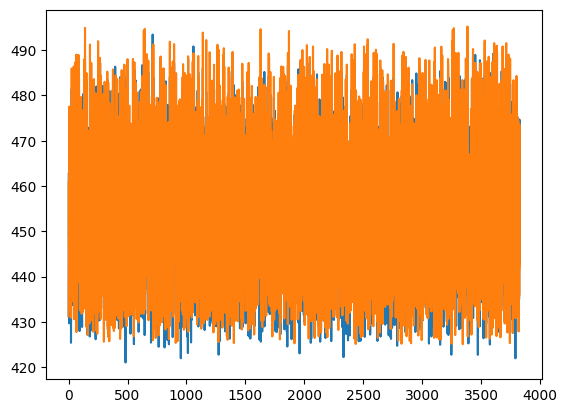

In [258]:
plt.plot(y_pred1)
plt.plot(y_test)
plt.show()

## Polynomial Regression Model

Polynomial Regression is a variation of linear regression used when the relationship between the independent and dependent variables is not linear but can be better represented by a curve (polynomial).

Instead of fitting a straight line, Polynomial Regression fits a polynomial equation to the data, allowing for more complex patterns.

The process involves finding the coefficients of the polynomial equation that best fit the data, enabling accurate predictions for new data points.

In [259]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
p_reg = PolynomialFeatures(degree = 4)
x_p = p_reg.fit_transform(x_train)
regressor2 =  LinearRegression()
regressor2.fit(x_p,y_train)

LinearRegression()

In [260]:
y_pred2 = regressor2.predict(p_reg.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1),y_test.reshape(len(y_test),1)),1))

[[434.31 431.23]
 [458.09 460.01]
 [460.72 461.14]
 ...
 [453.86 452.85]
 [479.59 473.55]
 [438.62 436.06]]


In [261]:
r2_score(y_test,y_pred2)

0.9454378864070658

## Support Vector Regression Model

Feature scaling is a crucial preprocessing step in many machine learning algorithms to bring all features to a similar scale, ensuring that they contribute equally to the learning process. However, the reason why we don't always have to do feature scaling for multiple linear regression but often need to do it for Support Vector Regression (SVR) lies in the inherent characteristics of these algorithms.

Multiple Linear Regression:
In multiple linear regression, the algorithm tries to find the best-fitting line that minimizes the sum of squared errors between the predicted values and the actual target values. The coefficients (weights) of the features determine how much each feature influences the prediction. Since the goal is to find the best coefficients to fit the line, the scale of the features does not impact the direction or magnitude of the line itself. In other words, changing the scale of a feature won't change the shape of the line; it will only affect the magnitude of the corresponding coefficient. Therefore, feature scaling is not a strict requirement for multiple linear regression.

Support Vector Regression (SVR):
On the other hand, SVR is a variant of Support Vector Machines (SVM) used for regression tasks. SVM, including SVR, relies on the concept of "margin" to find the best hyperplane (or curve in the case of SVR) that separates the data points. The algorithm aims to maximize the margin around the hyperplane while minimizing the prediction error. The scale of the features directly affects the shape and orientation of the hyperplane because SVM works based on the distance between data points and the hyperplane. When features are on different scales, their influence on the distance calculation can vary significantly. This discrepancy in scale can lead to uneven weighting of features and adversely affect the performance of SVR.

To ensure fair and accurate comparisons during the distance calculations, it is essential to bring all features to a similar scale in SVR. Feature scaling in SVR ensures that each feature contributes proportionally to the distance calculation, and the algorithm can make reliable predictions even when the features have different scales.

In summary, while multiple linear regression is not very sensitive to feature scaling due to its nature of finding the best coefficients for a line, SVR relies on the scale of features to determine the best hyperplane, making feature scaling a critical step to achieve optimal results.

Multiple linear regression is not very sensitive to feature scaling due to its nature of finding the best coefficients for a line, SVR relies on the scale of features to determine the best hyperplane, making feature scaling a critical step to achieve optimal results.

In [262]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

In [263]:
from sklearn.svm import SVR
regressor3 = SVR(kernel = 'rbf')
regressor3.fit(x_train1,y_train)

SVR()

In [264]:
y_pred3 = regressor3.predict(x_test1)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1),y_test.reshape(len(y_test),1)),1))

[[433.84 431.23]
 [457.44 460.01]
 [461.89 461.14]
 ...
 [453.94 452.85]
 [475.63 473.55]
 [439.63 436.06]]


In [265]:
r2_score(y_test,y_pred3)

0.9411173142807201

## Decision Tree Model

A Decision Tree is a popular machine learning algorithm used for both regression and classification tasks.

It is a tree-like structure where each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents the final prediction or class label.

Here's how a Decision Tree works in a classification task:

1. Data Collection: Gather data with both the independent variables (features) and the dependent variable (target) or class labels.

2. Data Preprocessing: Handle missing data, encode categorical variables if needed, and split the data into training and testing sets.

3. Model Building: The Decision Tree algorithm selects the most important feature (attribute) from the data and creates a root node. It then splits the data based on the selected feature into subsets. This process continues recursively for each subset, creating child nodes and further splits until it reaches the leaf nodes, where the final predictions are made.

4. Decision Making: At each internal node, the Decision Tree algorithm makes decisions based on the feature's value. For example, "If feature A is greater than 5, go to the right child node; otherwise, go to the left child node." This process continues until it reaches a leaf node, where the class label is assigned to the data point.

5. Prediction: To make predictions for new data points, the algorithm follows the decision path in the tree based on the values of the features and arrives at a leaf node, which provides the final class label for the data point.

Decision Trees are easy to interpret and visualize, and they can handle both categorical and numerical features.

However, they can be prone to overfitting, especially if the tree becomes too deep and complex.

To address overfitting, techniques like pruning, limiting the tree depth, or using ensemble methods like Random Forest can be applied.

In summary, a Decision Tree is a simple yet powerful algorithm that can learn complex relationships between features and class labels.

It is widely used in various domains, including finance, healthcare, and marketing, for tasks like customer segmentation, fraud detection, and medical diagnosis.

In [266]:
from sklearn.tree import DecisionTreeRegressor
regressor5 = DecisionTreeRegressor()
regressor5.fit(x_train,y_train)

DecisionTreeRegressor()

In [267]:
y_pred5 = regressor5.predict(x_test)
print(np.concatenate((y_pred5.reshape(len(y_pred5),1),y_test.reshape(len(y_test),1)),1))

[[433.14 431.23]
 [458.34 460.01]
 [460.19 461.14]
 ...
 [453.92 452.85]
 [480.6  473.55]
 [437.76 436.06]]


In [268]:
r2_score(y_test,y_pred5)

0.9226754089606757

## Random Forest Model

Random Forest Regression is a machine learning algorithm that is an extension of decision tree regression. It works by creating an ensemble of multiple decision trees and combining their predictions to make more accurate and robust predictions.

Each decision tree is trained on a random subset of the data and features, which adds randomness and diversity to the model.

Random Forest Regression is a powerful algorithm that can handle complex relationships between features and the target variable. It is less prone to overfitting compared to individual decision trees, making it more robust and accurate.

Random Forest Regression is commonly used in various domains, including finance, healthcare, and retail, for tasks such as predicting stock prices, medical diagnoses, and customer behavior. Its ability to handle a large number of features and high-dimensional data makes it a popular choice for regression problems where data has multiple predictors.

The main steps in Random Forest Regression are as follows:

1. Data Collection: Gather the data with both the independent variables (features) and the dependent variable (target).

2. Data Preprocessing: Handle missing data, encode categorical variables if needed, and split the data into training and testing sets.

3. Model Building: Create an ensemble of decision trees. Each tree is trained on a random subset of the data (bootstrap samples) and a random subset of features. This introduces diversity among the trees.

4. Prediction: To make predictions, pass the new data through each tree in the ensemble. The final prediction is obtained by averaging (for regression tasks) or voting (for classification tasks) the predictions from all the trees.

5. Model Evaluation: Evaluate the model's performance on the test data using metrics like Mean Squared Error (MSE) or R-squared (R2) to assess how well the model generalizes to unseen data.

Random Forest Regression is less prone to overfitting compared to individual decision trees because of two main reasons:

1. Ensemble of Trees:

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions.

Each tree in the forest is trained on a random subset of the data (bootstrap sample) and a random subset of features. This introduces randomness and diversity into the model.

By averaging the predictions of multiple trees, the noise and variance associated with individual trees tend to cancel out, leading to a more robust and stable prediction.

This ensemble approach helps to reduce overfitting because it prevents the model from memorizing noise or outliers present in the data.

2. Feature Randomization:

In addition to using random subsets of the data, Random Forest also performs feature randomization.

For each split in a decision tree, only a random subset of features is considered, rather than using all features.

This helps to decorrelate the trees and reduces the risk of the model becoming overly sensitive to any specific feature.

By incorporating feature randomization, the model becomes more generalized and less likely to overfit the training data.

Together, these techniques of ensemble learning and feature randomization in Random Forest make the model more robust and less prone to overfitting. The diversity among the trees and the averaging of predictions allow the model to capture the underlying patterns in the data while minimizing the effects of noise and individual data points. As a result, Random Forest Regression tends to generalize well to unseen data, making it a reliable and accurate regression algorithm.

In [269]:
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor(n_estimators=26)
regressor4.fit(x_train,y_train)

RandomForestRegressor(n_estimators=26)

In [270]:
y_pred4 = regressor4.predict(x_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1),y_test.reshape(len(y_test),1)),1))

[[434.43 431.23]
 [457.58 460.01]
 [463.73 461.14]
 ...
 [454.07 452.85]
 [478.22 473.55]
 [440.07 436.06]]


In [271]:
r2_score(y_test,y_pred4)

0.9598002468021274

## Final Results:

Multiple Linear Regression Model:     

- 0.931984442047452

Polynomial Regression Model:     

- 0.9454378864070658

Support Vector Regression Model:

- 0.9411173142807201

Decision Tree Model:
     
- 0.9207420157677753

Random Forest Model:

- 0.960318410788164

Therefore, Random Forest Regression Model is giving the best results for our Nuclear Power Plant Energy Prediction Analysis project.